<a href="https://colab.research.google.com/github/solharsh/Capstone_Sentiment_Analysis/blob/master/Clean_EDA_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNDERSTANDING AND NORMALIZING CORPUS (EDA)

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
pip install contractions 

     |████████████████████████████████| 317kB 6.5MB/s 
     |████████████████████████████████| 245kB 41.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81709 sha256=593c39029efba53e8a6cf9b6df324be0ecb00facf59dae5962b7c4d1502ae035
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [6]:
import os
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('averaged_perceptron_tagger')
stopword = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
nltk.download('words')
from nltk.text import Text
import string, re
from sklearn.feature_extraction.text import CountVectorizer
string.punctuation
wn = nltk.WordNetLemmatizer()
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
#nlp = spacy.load('en')
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook as tqdm
from tqdm import trange
#analyzer = SentimentIntensityAnalyzer()
# more common imports
import pandas as pd
import numpy as np
from collections import Counter
import re

# languange processing imports
import nltk
from gensim.corpora import Dictionary
# preprocessing imports
from sklearn.preprocessing import LabelEncoder

# model imports
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV

# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline
sns.set()  # defines the style of the plots to be seaborn style

import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata

nlp = spacy.load('en', parse = False, tag=False, entity=False)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [0]:
#load the pickle file with dataframe created earlier
df = pd.read_pickle('/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/speech_corpus.pkl')

In [8]:
print("Number of Speeeches by respective speaker (Speech Count)")
print(df.groupby('Speaker_Name')['Speech'].count())
print("Word Count")
df.groupby('Speaker_Name').apply(lambda x: x.Speech.apply(lambda x: len(x.split())).sum())

Number of Speeeches by respective speaker (Speech Count)
Speaker_Name
Arun Jaitley          5
Nirmala Sitharaman    1
P. Chidambaram        2
Piyush Goyal          1
Pranab Mukherjee      3
Name: Speech, dtype: int64
Word Count


Speaker_Name
Arun Jaitley          96157
Nirmala Sitharaman    19518
P. Chidambaram        19411
Piyush Goyal           8155
Pranab Mukherjee      40806
dtype: int64

In [9]:
#shape of dataset
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 12 rows and 3 columns


Checking following things in our corpus:

> - Word count
- Negation
- Length of Speech
- If it has URL or not
- How many question marks it contains
- How many exclamation marks it contains


In [0]:
def stance_features_extraction(df):
    df['word_count'] = df['Speech'].apply(lambda x: len((re.sub(' +',' ',re.sub(r'[^a-zA-Z0-9 ]', '', x))).strip().split(' ')))
    df['negation'] = df['Speech'].apply(lambda x: any(n in x for n in ['no', 'not', "n\'t"]))
    df['length'] = df['Speech'].apply(len)
    df['has_url'] = df['Speech'].apply(lambda x: bool(re.search('http(s)?://', x)))
    df['quest_mark'] = df['Speech'].apply(lambda x: x.count('?'))
    df['excl_mark'] = df['Speech'].apply(lambda x: x.count('!'))
    #df['speech_polarity'] =  df['Speech'].apply(lambda x: TextBlob(x).sentiment.polarity)
    #df['speech_subjectivity'] =  df['Speech'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    #sid = SentimentIntensityAnalyzer()
    #df = df.join(df['Speech'].apply(lambda x: sid.polarity_scores(x)).apply(pd.Series))
    return df

In [71]:
df = stance_features_extraction(df)
df

Speaker_Name       Date_Of_Speech  ... quest_mark excl_mark
0     Pranab Mukherjee       March 16, 2012  ...          0         0
1         Arun Jaitley        July 10, 2014  ...          3         0
2         Arun Jaitley    February 28, 2015  ...          2         1
3         Piyush Goyal     February 1, 2019  ...          0         0
4   Nirmala Sitharaman         July 5, 2019  ...          1         1
5         Arun Jaitley     February 1, 2017  ...          1         0
6         Arun Jaitley     February 1, 2018  ...          0         0
7     Pranab Mukherjee  February  26,  2010  ...          2         0
8         Arun Jaitley    February 29, 2016  ...          1         0
9     Pranab Mukherjee    February 28, 2011  ...          0         1
10      P. Chidambaram    February 28, 2013  ...          5         0
11      P. Chidambaram    February 17, 2014  ...          2         0

[12 rows x 10 columns]

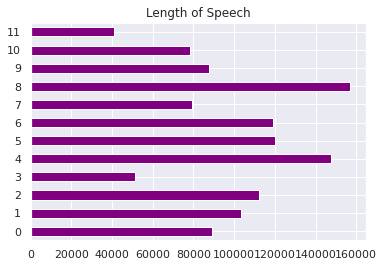

In [14]:
df['length'].plot.barh(color='purple')
plt.title('Length of Speech')
plt.show()

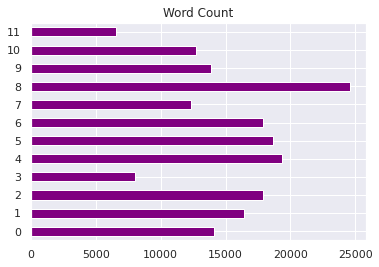

In [15]:
df['word_count'].plot.barh(color='purple')
plt.title('Word Count')
plt.show()

It is difficult from above figure to understand who is the speaker. To keep track of the speakers, I am creating a new column that is the concatenation of the date and speakers’s name.
This column will be the index of our term-document matrix.


In [0]:
speakers = df[['Speaker_Name','Date_Of_Speech']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)

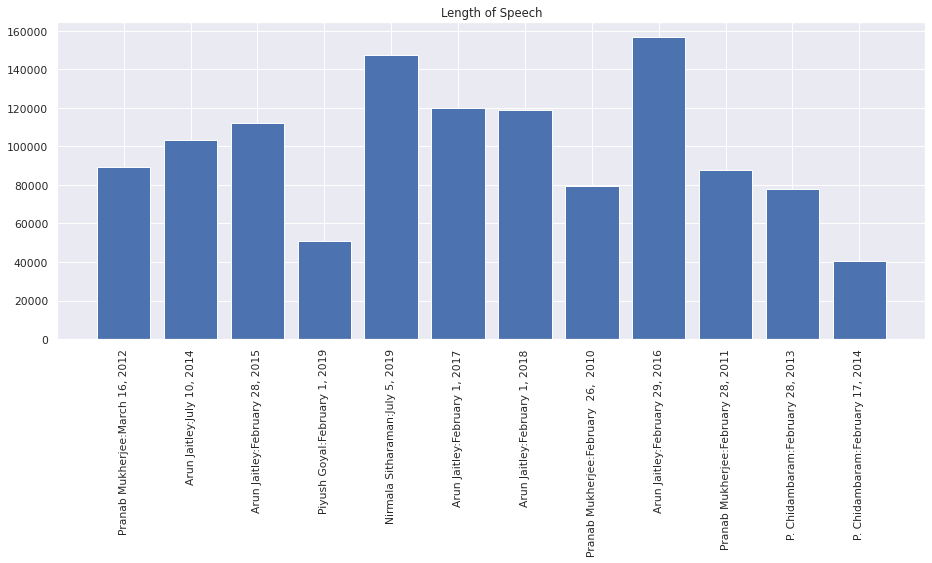

In [17]:
#let's check the length and word count with speakers name now
x = speakers
y = df["length"]
plt.figure(figsize=(16, 6),dpi=70)
plt.xticks(rotation=90)
plt.title('Length of Speech')
plt.bar(x,y)
plt.show()

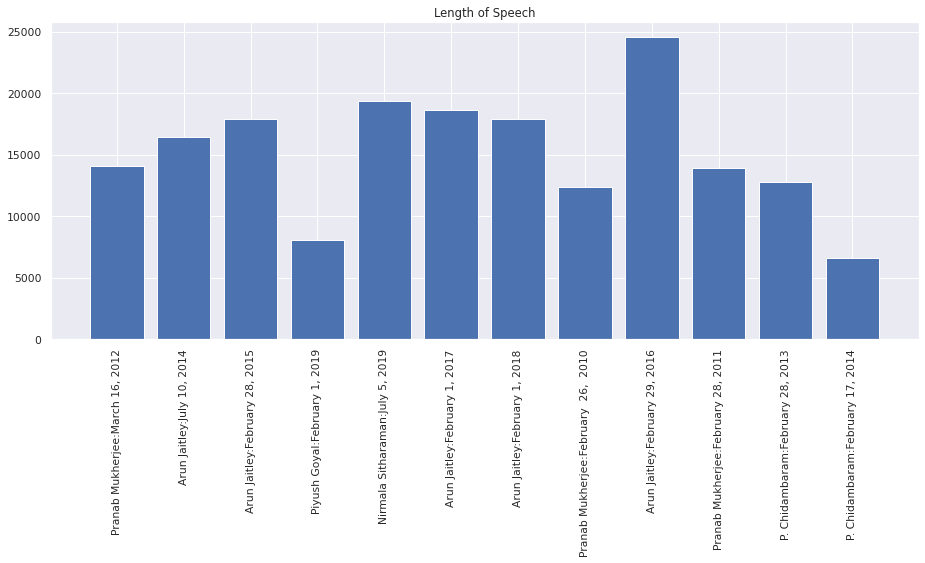

In [18]:
x = speakers
y = df["word_count"]
plt.figure(figsize=(16, 6),dpi=70)
plt.xticks(rotation=90)
plt.title('Length of Speech')
plt.bar(x,y)
plt.show()

## INSIGHTS FROM ABOVE FUNCTION

- Arun Jaitley has a lot to say in February 29, 2016 (longest speech of 24551 words)
- On the other hand P. Chidambaram ran short of words on February 17, 2014 (shortest speech of 6564 words)
- URL was found in first three speeches of Pranab Mukherjee which we will be removing in upcoming cleaning steps.
- Not many question marks are there and therefore, we do not need to emphasize much on the sentiment associated with those questions and we can simply remove the punctuation. 
- The same goes for exclamation mark. 

Also, I am intrigued by the length of speeches by Nirmala Sitharaman and Arun Jaitley. Let's check it manually.

This made me observe that the format of 11th Speech is as follows: 
    
- The
- recent 
- election 
- which 
- brought 
- us 
- to 
- this 
- august 
- House 
- today, 

i.e every word is written in next line instead of continuous sentences

In [0]:
NS_Speech = df['Speech'][11]
#NS_Speech

In [0]:
#Let's correct the format and making it similar to all other speeches. 

import re
NS_Speech = NS_Speech.replace('\n','')
NS_Speech
df['Speech'][11] = NS_Speech

The speech contains few continuos sentences without any space in between. For example: 
exportedintheprecedingfinancialyearVReductionincustomsdutyforDefencesector57AnyChapterSpecifiedMilitaryequipmentandtheirpartsimportedbyMinistryofDefenceorArmedforcesApplicablerateNilVIAdditionalrevenuemeasures587106Silver

This cannot be fixed due to lack of pattern.

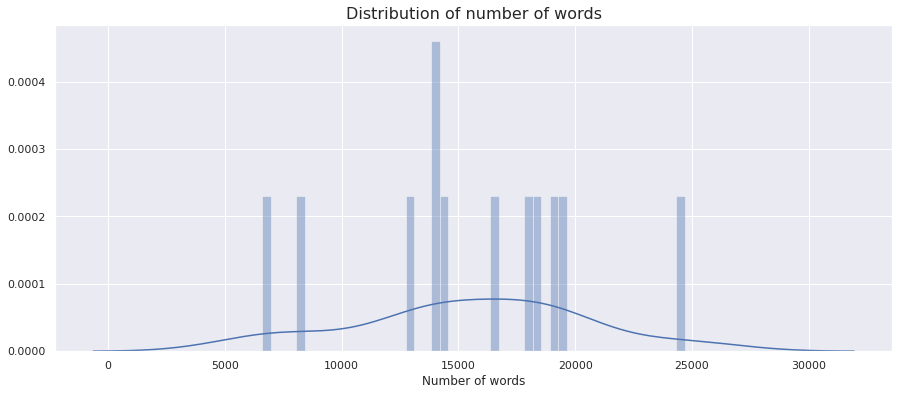

In [72]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(speech_lengths, bins=50, ax=ax);

In [74]:
print("There are {} documents with over 15503 words (average number of words).".format(sum(speech_lengths > 15503)))
shorter_documents = speech_lengths[speech_lengths <= 15503]

There are 6 documents with over 15503 words (average number of words).


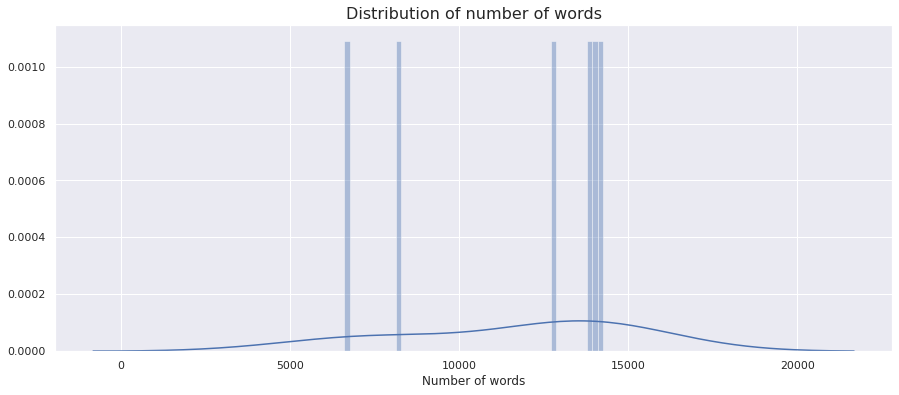

In [75]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(shorter_documents, bins=50, ax=ax);

In [76]:
print("There are {} speech(es) with tops 10000 words.".format(sum(speech_lengths <= 10000)))

There are 2 speech(es) with tops 10000 words.


In [19]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## TEXT CLEANING

In [0]:
#Cleaning Text - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
#Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
#Expanding Contractions
def expand_contractions(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#Removing Special Characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text
#Lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
#Removing Stopwords
# These words are important for our problem. We don't want to remove them.
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop_words = [word for word in stopword_list if word not in excluding]

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


### Normalize text corpus - tying it all together

In [0]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # Remove leading/trailing whitespace
        doc = re.sub('\s+', ' ', doc)
        # Removing numbers
        doc = re.sub(r"\d+","",doc)
        # Remove URLs
        doc = re.sub(r'http\S+', '', doc) 
        # Remove extra space and tabs
        doc = re.sub('\s+', ' ', doc) 
        # Reove accronyms
        doc = re.sub(r"\b[A-Z]{2,}\b", "", doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [57]:
print("Pre-processing the Speech field with use of Lemmatization")
df["Speech_Cleaned"] = normalize_corpus(df["Speech"].tolist()) 

Pre-processing the Speech field with use of Lemmatization


In [59]:
speech_lengths_updated = np.array(list(map(len, df.Speech_Cleaned.str.split(' '))))
speech_lengths = np.array(list(map(len, df.Speech.str.split(' '))))
print("The average number of words in a document is: {}.".format(np.mean(speech_lengths_updated)))
print("The minimum number of words in a document is: {}.".format(min(speech_lengths_updated)))
print("The maximum number of words in a document is: {}.".format(max(speech_lengths_updated)))
print('-'*70)
print("The average number of words in a document is: {}.".format(np.mean(speech_lengths)))
print("The minimum number of words in a document is: {}.".format(min(speech_lengths)))
print("The maximum number of words in a document is: {}.".format(max(speech_lengths)))

The average number of words in a document is: 8595.666666666666.
The minimum number of words in a document is: 3524.
The maximum number of words in a document is: 13966.
----------------------------------------------------------------------
The average number of words in a document is: 15499.916666666666.
The minimum number of words in a document is: 6604.
The maximum number of words in a document is: 24693.


In [60]:
df['word_count_cleaned'] = df['Speech_Cleaned'].apply(lambda x: len((re.sub(' +',' ',re.sub(r'[^a-zA-Z0-9 ]', '', x))).strip().split(' ')))
df['negation_cleaned'] = df['Speech_Cleaned'].apply(lambda x: any(n in x for n in [' no ', ' not ', 'n\'t ']))
df['length_cleaned'] = df['Speech_Cleaned'].apply(len)
df['has_url_cleaned'] = df['Speech_Cleaned'].apply(lambda x: bool(re.search('http(s)?://', x)))
df['quest_mark_cleaned'] = df['Speech_Cleaned'].apply(lambda x: x.count('?'))
df['excl_mark_cleaned'] = df['Speech_Cleaned'].apply(lambda x: x.count('!'))
df

Speaker_Name  ... excl_mark_cleaned
0     Pranab Mukherjee  ...                 0
1         Arun Jaitley  ...                 0
2         Arun Jaitley  ...                 0
3         Piyush Goyal  ...                 0
4   Nirmala Sitharaman  ...                 0
5         Arun Jaitley  ...                 0
6         Arun Jaitley  ...                 0
7     Pranab Mukherjee  ...                 0
8         Arun Jaitley  ...                 0
9     Pranab Mukherjee  ...                 0
10      P. Chidambaram  ...                 0
11      P. Chidambaram  ...                 0

[12 rows x 16 columns]

We can see that after cleaning, there are no URLs, question mark or exclamation mark and there is significant reduction in Word count and length too.

In [63]:
#Removing the columns that are not required anymore
df = df.drop(['word_count','negation','length','has_url','quest_mark','excl_mark','negation_cleaned','length_cleaned','word_count_cleaned',
              'quest_mark_cleaned','excl_mark_cleaned','has_url_cleaned'],axis=1)
df.head(2)

Speaker_Name  ...                                     Speech_Cleaned
0  Pranab Mukherjee  ...  budget speech pranab mukherjee minister financ...
1      Arun Jaitley  ...  budget speech arun jaitley minister finance ju...

[2 rows x 4 columns]

In [66]:
ns = df['Speech'][11]
ns


'Interim Budget 2014-2015 \n\nSpeech of \n\nP. Chidambaram \n\nMinister of Finance \n\nFebruary 17, 2014 \n\nMadam Speaker, \nINTRODUCTION \nI rise to present the Interim Budget for 2014-15. \n\nThe Current Economic Situation \n\n2. As I prepared to write this speech, I found that whether it is a regular Budget for the \nfull year or an interim Budget, some things remain the same. For example, our goals are the \nsame and the global context is the same. As I said last year, we are not unaffected by what \nhappens in the rest of the world. Since September 2008, the state of the world economy has \nbeen the most decisive factor impacting the fortunes of every developing country. Hence, it is \npertinent to say a few words on the global economy as well as on the global risks. \n3. World economic growth was 3.9 percent in 2011, 3.1 percent in 2012 and 3.0 percent \nin 2013. Those numbers tell the story. Among India\x92s major trading partners, who are also \nthe major sources of our foreig

# WORD CLOUD

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS as wcloud_stop
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
from nltk.corpus import stopwords
from datetime import date
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

#stopwords = set(wcloud_stop)

#def show_wordcloud(data, title = None):
#    wordcloud = WordCloud(
#        background_color='black',
#        stopwords=stop_words,
#        max_words=900,
#        max_font_size=40, 
#        scale=5,
#        random_state=1
#    ).generate(str(data))

#    fig = plt.figure(1, figsize=(15,15))
#    plt.axis('off')
#    if title: 
#        fig.suptitle(title, fontsize=14)
#        fig.subplots_adjust(top=2.3)

#    plt.imshow(wordcloud)
#    plt.show()


def show_wordcloud(speech, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=900,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(speech))

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [0]:
# This function combines all of an individual presidents speeches and returns the POS
def speech_combiner(Finance_minister):
    dataframe = df['Speech_Cleaned'].loc[df['Speaker_Name'] == Finance_minister]
    return dataframe
PM_Speech = speech_combiner("Pranab Mukherjee")

In [113]:
PM_Speech

0    budget speech pranab mukherjee minister financ...
7    budget speech pranab mukherjee minister financ...
9    budget speech pranab mukherjee minister financ...
Name: Speech_Cleaned, dtype: object

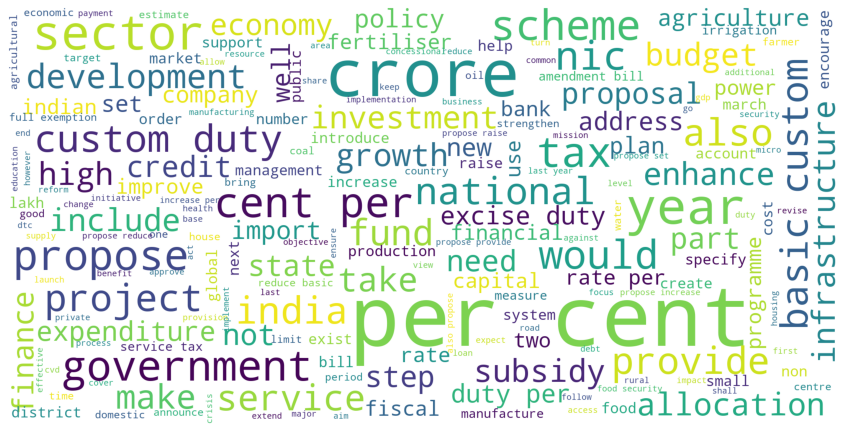

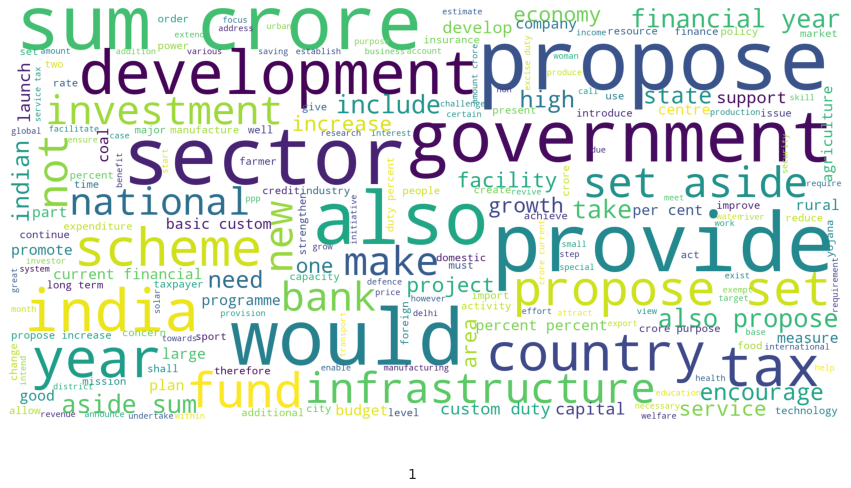

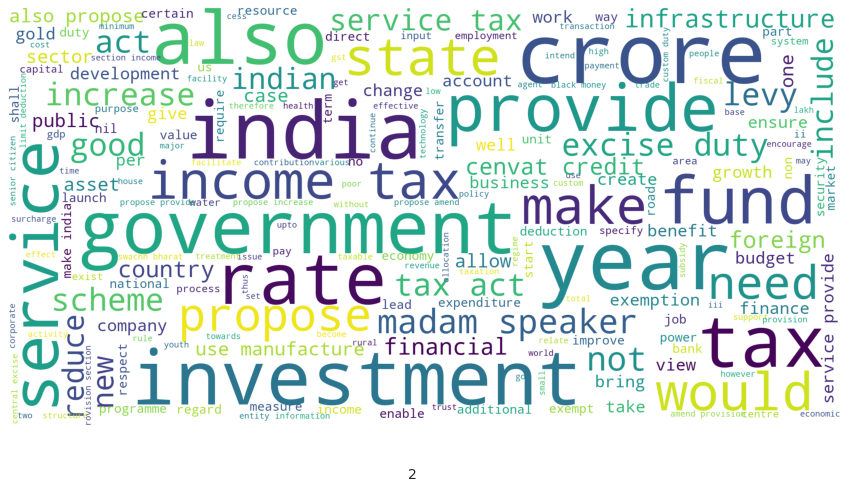

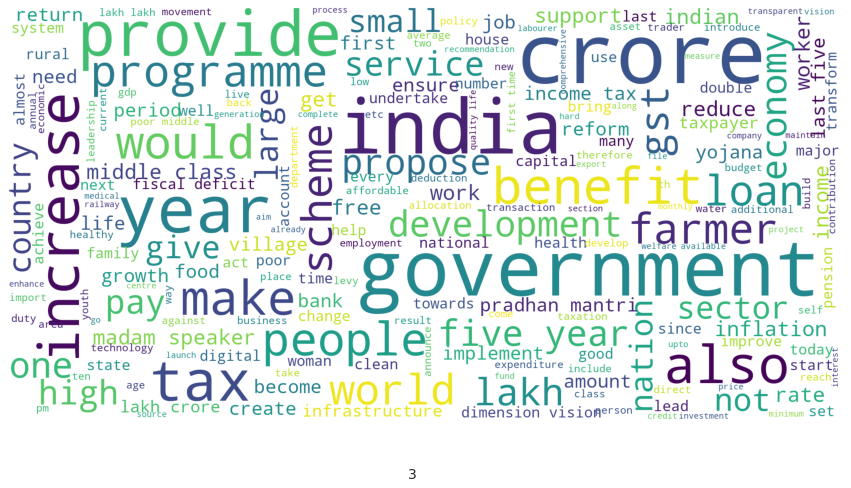

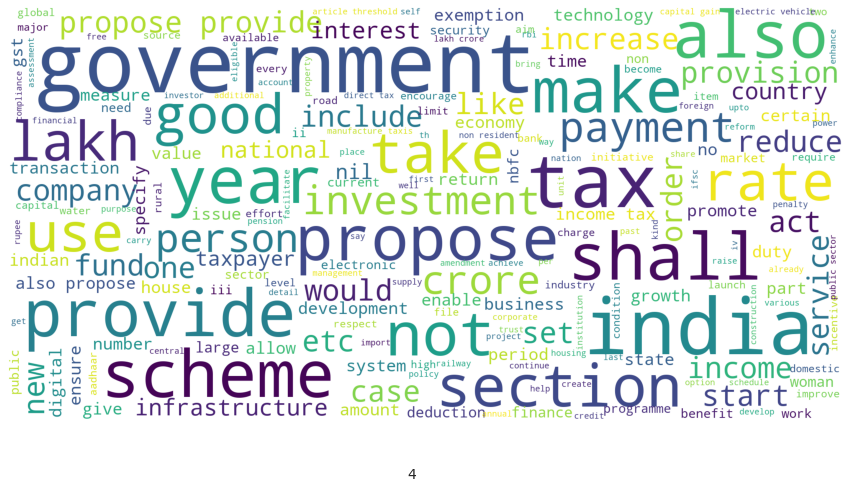

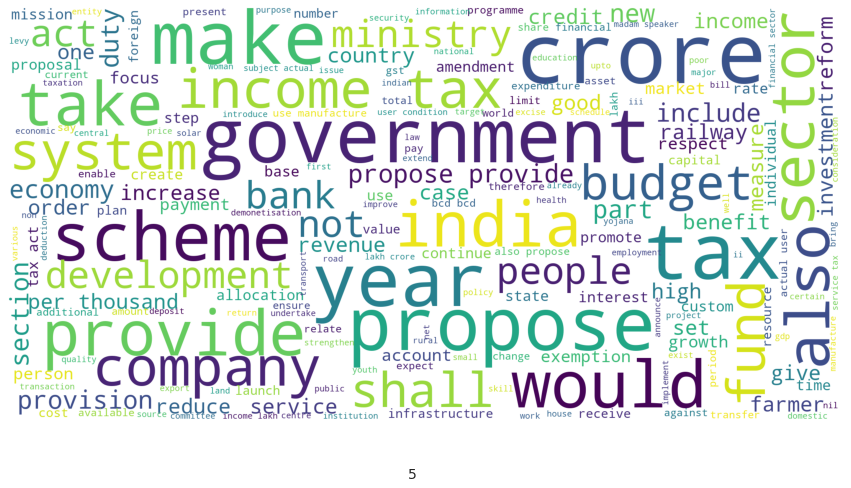

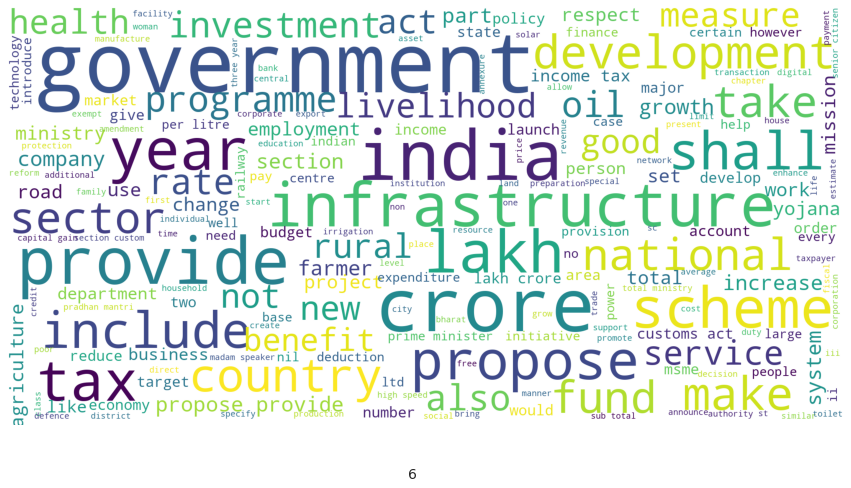

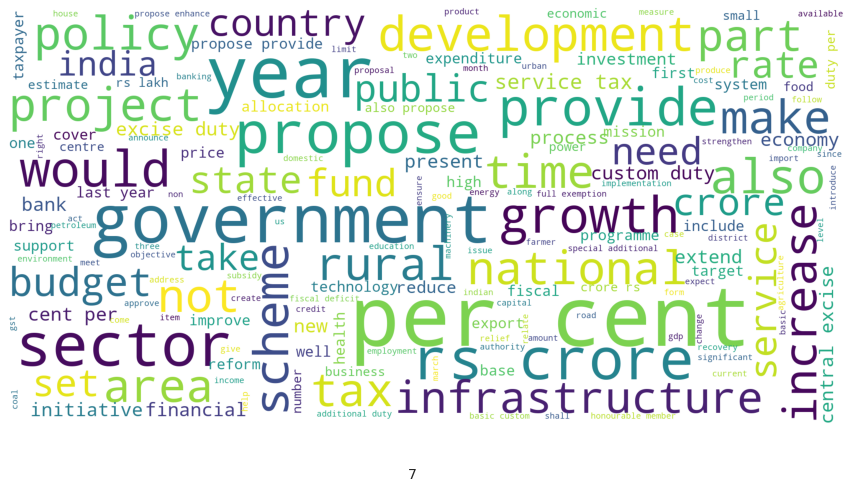

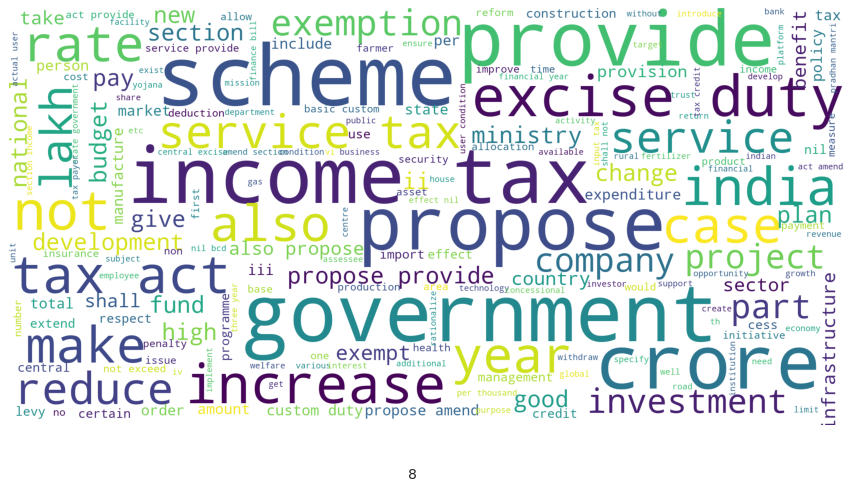

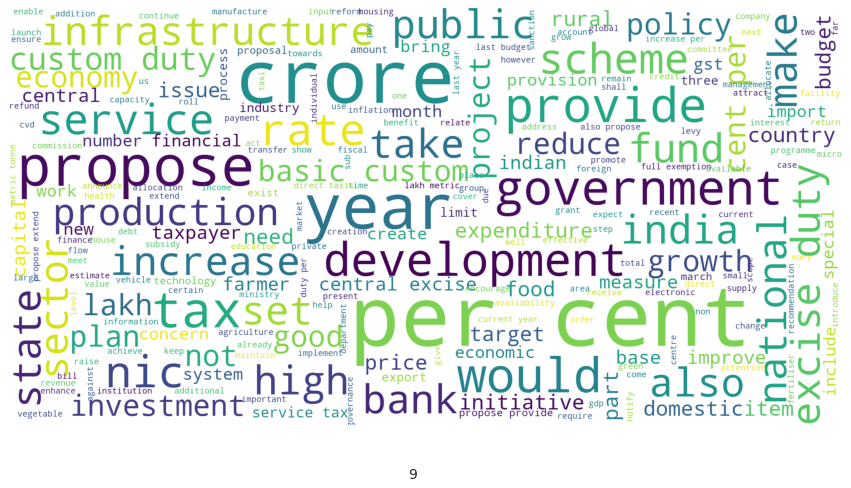

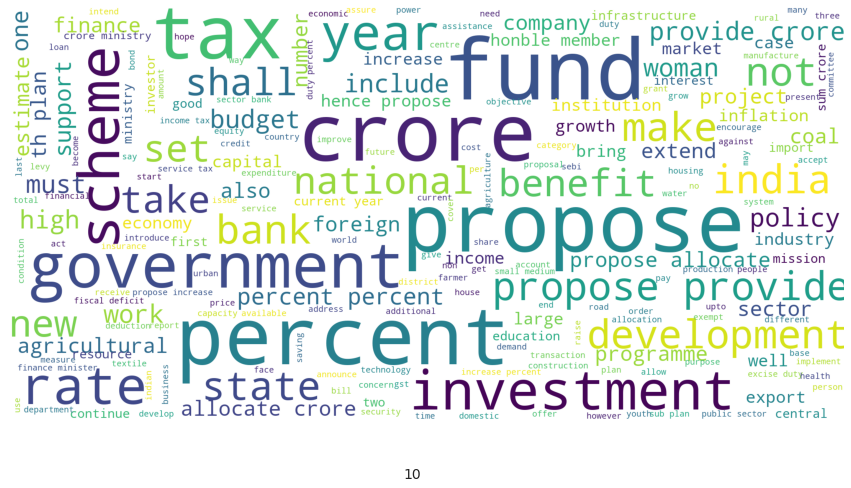

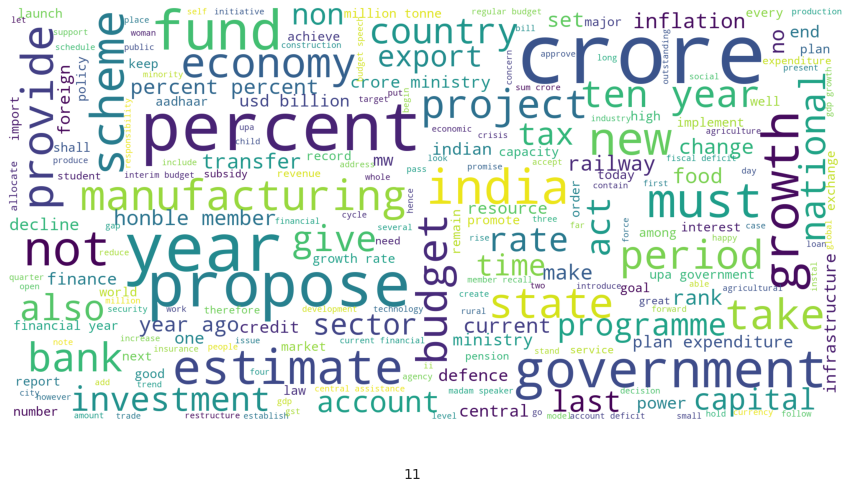

In [114]:
x = speakers
# Create subplots for each speech
for index, speech in enumerate(df.Speech_Cleaned):
        show_wordcloud(speech, index)
        plt.show()

In [0]:
from google.colab import files
df.to_csv('/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/speech_cleaned_checkpoint.csv') 
files.download('/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/speech_cleaned_checkpoint.csv')
df.to_pickle('/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/speech_cleaned_checkpoint.pkl')